In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link='https://drive.google.com/open?id=1nya0IO9vUmwerdy4jmo_Q1dbjEu-XSqr'

In [3]:
fluff, id = link.split('=')
print(id) # Verify that you have everything after '='

1nya0IO9vUmwerdy4jmo_Q1dbjEu-XSqr


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Advertising.csv')  

In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split

In [0]:
df=pd.read_csv('Advertising.csv',names=["Index","TV","Radio","Newspaper","Sales"],skiprows=1)

In [7]:
df.head()

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [0]:
TV=df.iloc[:,1]
Radio=df.iloc[:,2]
Newspaper=df.iloc[:,3]
Sales=df.iloc[:,4]

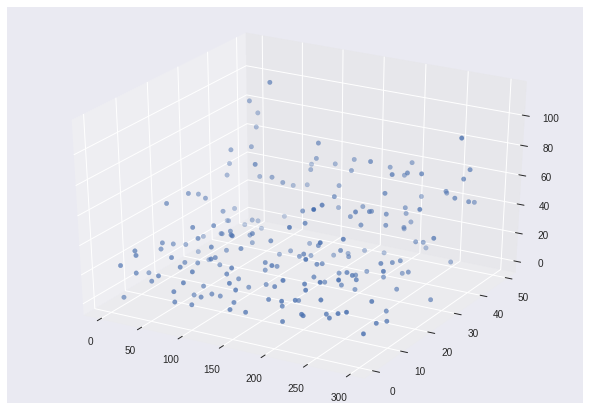

In [9]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(TV,Radio,Newspaper)
plt.show()

In [0]:
X=pd.concat([TV,Radio,Newspaper],axis=1)
Y=Sales

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [0]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

In [13]:
Coef=reg.coef_
print(Coef)

[0.04405928 0.1992875  0.00688245]


In [14]:
R2=r2_score(y_test,y_pred)
print(R2)

0.8609466508230368


In [15]:
MSE=mean_squared_error(y_test,y_pred)
print(MSE)

3.796797236715219


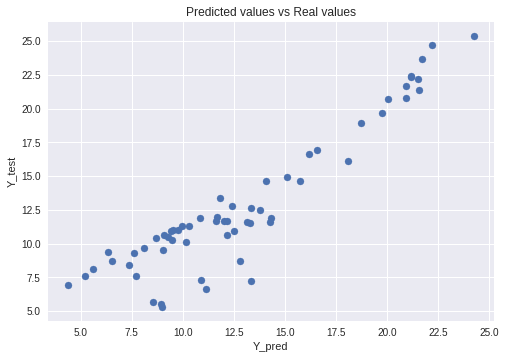

In [16]:
plt.scatter(y_pred,y_test)
plt.title('Predicted values vs Real values')
plt.xlabel('Y_pred')
plt.ylabel('Y_test')
plt.show()

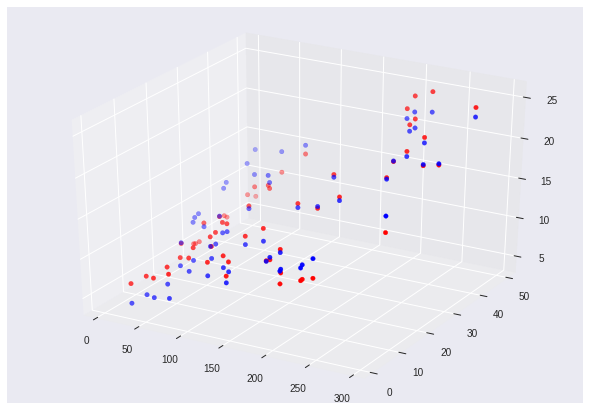

In [17]:
fig2=plt.figure()
ax2=Axes3D(fig2)
ax2.scatter(X_test['TV'],X_test['Radio'],y_test,color='red')
ax2.scatter(X_test['TV'],X_test['Radio'],y_pred,color='blue')
plt.show()